# 1. Data distributions
An important consideration before building a machine learning model is to understand what the distribution of your underlying data looks like. A lot of algorithms make assumptions about how your data is distributed or how different features interact with each other. For example almost all models besides tree based models require your features to be on the same scale. Feature engineering can be used to manipulate your data so that it can fit the assumptions of the distribution, or at least fit it as closely as possible.

2. Distribution assumptions
Almost every model besides tree based models assume that your data is normally distributed. Normal distributions follow a bell shape like shown here, the main characteristics of a normal distribution is that 68 percent of the data lies within 1 standard deviation of the mean,95% percent lies within 2 standard deviations from the mean and 99.7% fall within 3 standard deviations from the mean.

3. Observing your data
To understand the shape of your own data you can create histograms of each of the continuous features. To do so, once you have the matplotlib library loaded, along with your DataFrame, run hist() on your data frame followed by calling plt dot show to observe the graph. Here we see the first column has a fairly normal looking distribution, but the second looks quite different, with the majority of the data skewed to the lower values. This is also referred to having a long right tail.

4. Delving deeper with box plots
While histograms can be useful to show the high level distribution of the data, it does not show details such as where the middle chunk of your data sits in an easily readable fashion. For this you can use the box plot. The box plot shows the distribution of the data by calculating where the middle 50% of the data sits, this is also known as the Inter quartile range or IQR (it sits between the 1st and 3rd quartile) and marking it with the box. The whiskers extend to the minimum of 1.5 times the IQR from the edge of the box or the maximum range of the data. Any points outside this are marked as outliers. This can be useful to also see if there are points in your dataset that may be unwanted outliers.

5. Box plots in pandas
To create a box plot in pandas, you can call the boxplot() method on a list of columns you wish to plot.

6. Paring distributions
One final approach to looking at the distribution of data is to examine how different features in your DataFrame interact with each other. This type of chart is called a pairplot and can be useful to see if multiple columns are correlated with each other or whether they have any association at all. To generate a pairplot, first you need to import the seaborn package and then call the pairplot() function on your DataFrame. In this example we can see that the first and last columns are somewhat related.

7. Further details on your distributions
While all these plots are very useful to get an understanding of your data's shape, you will at times want to quickly get summary statistics of your data's distribution. This can be found using the describe() method as seen here on the same dummy dataset we have been using to demonstrate the plots.

8. Let's practice!
Why is this important? Now that you are capable of seeing the underlying structure of the data, in later lessons, you will remove outliers and ensure all features are on comparable scales.

In [6]:
# Import pandas
import pandas as pd
import matplotlib.pyplot as plt
# Import so_survey_csv into so_survey_df
so_survey_df = pd.read_csv('Combined_DS_v10.csv')

# What does your data look like? (I)
Up until now you have focused on creating new features and dealing with issues in your data. Feature engineering can also be used to make the most out of the data that you already have and use it more effectively when creating machine learning models.
Many algorithms may assume that your data is normally distributed, or at least that all your columns are on the same scale. This will often not be the case, e.g. one feature may be measured in thousands of dollars while another would be number of years. In this exercise, you will create plots to examine the distributions of some numeric columns in the so_survey_df DataFrame, stored in so_numeric_df.

Generate box plots of the Age and Years Experience columns in the so_numeric_df DataFrame.

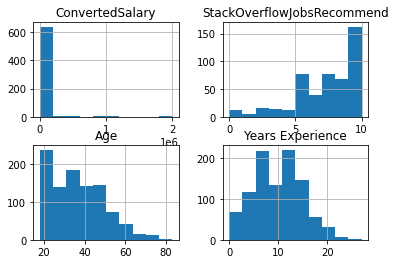

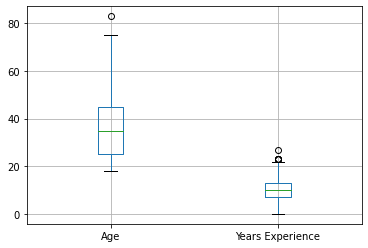

In [8]:
# Create a histogram
so_numeric_df = so_survey_df.select_dtypes(include=['int','float'])
so_numeric_df.hist()
plt.show()
# Create a boxplot of two columns
so_numeric_df[['Age', 'Years Experience']].boxplot()
plt.show()

Generate box plots of the Age and Years Experience columns in the so_numeric_df DataFrame.